 This is the project based on "Employee salary Prediction" Predicting salary of a fresher during college placement.


In [128]:
# Data Loading
import pandas as pd


In [129]:
# Loading dataset from the CSV file.

data = pd.read_csv("placement.csv")


In [130]:
data

,Name of Student,Roll No.,No. of DSA questions,CGPA,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows HTML,Knows CSS,Knows Cricket,Knows Dance,Participated in College Fest,Was in Coding Club,No. of backlogs,Interview Room Temperature,Age of Candidate,Branch of Engineering,Placement Package
0,Todd Pope,30678,151,8.52,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,2,24.2,24,Computer Science,20.01
1,Sandra Brown,49191,24,1.23,Yes,No,No,Yes,No,No,Yes,No,No,Yes,1,20.5,18,Computer Science,10.97
2,Mrs. Amanda Singleton,83519,333,9.85,No,Yes,Yes,No,Yes,No,No,No,No,No,1,21.6,25,Mechanical Engineering,7.51
3,Matthew Alvarado,56203,132,1.96,No,No,Yes,No,Yes,No,No,No,Yes,No,4,21.2,20,Computer Science,4.96
4,Christine Smith,82173,198,9.73,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,1,20.7,21,Electrical Engineering,46.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219995,Ashley Conner,36698,453,8.77,No,Yes,No,Yes,No,Yes,No,Yes,No,Yes,5,28.4,24,Electrical Engineering,24.81
219996,Samuel Kemp,85027,375,6.15,No,No,Yes,Yes,No,No,No,Yes,No,No,3,27.6,18,Electrical Engineering,11.00
219997,Alexander Payne,92497,52,2.05,No,No,No,No,Yes,No,No,No,Yes,Yes,4,27.2,25,Computer Science,3.82
219998,Sean Bauer,35235,404,5.63,No,No,Yes,Yes,No,Yes,No,No,No,Yes,0,25.0,21,Mechanical Engineering,47.80


In [131]:
# first few rows.
print("First 5 rows of our data:")
print(data.head())

First 5 rows of our data:
         Name of Student  Roll No.  No. of DSA questions  CGPA Knows ML  \
0              Todd Pope     30678                   151  8.52      Yes   
1           Sandra Brown     49191                    24  1.23      Yes   
2  Mrs. Amanda Singleton     83519                   333  9.85       No   
3       Matthew Alvarado     56203                   132  1.96       No   
4        Christine Smith     82173                   198  9.73      Yes   

  Knows DSA Knows Python Knows JavaScript Knows HTML Knows CSS Knows Cricket  \
0       Yes          Yes              Yes         No       Yes            No   
1        No           No              Yes         No        No           Yes   
2       Yes          Yes               No        Yes        No            No   
3        No          Yes               No        Yes        No            No   
4       Yes          Yes              Yes        Yes       Yes           Yes   

  Knows Dance Participated in College Fest

In [133]:
print("\n data has", data.shape, "rows and columns")


 data has (220000, 19) rows and columns


In [134]:
# checking missing values.

print("\nMissing values in each column:")
print(data.isna().sum())



Missing values in each column:
Name of Student                    0
Roll No.                           0
No. of DSA questions               0
CGPA                               0
Knows ML                        4419
Knows DSA                          0
Knows Python                    4427
Knows JavaScript                4282
Knows HTML                      4329
Knows CSS                       4322
Knows Cricket                      0
Knows Dance                        0
Participated in College Fest       0
Was in Coding Club                 0
No. of backlogs                    0
Interview Room Temperature         0
Age of Candidate                   0
Branch of Engineering              0
Placement Package                  0
dtype: int64


In [135]:
# Now cleaning up the data.
print("\n--- Data Cleaning ---")


--- Data Cleaning ---


In [136]:
# removing unnecessary columns
cols_to_drop = [
    'Interview Room Temperature',
    'Knows Cricket',
    'Knows Dance',
    'Participated in College Fest',
    'Was in Coding Club',
    'Knows HTML',
    'Knows CSS'
]
data = data.drop(columns=cols_to_drop)
print("Shape after dropping unnecessary columns:", data.shape)


Shape after dropping unnecessary columns: (220000, 12)


In [137]:

#  converting Yes and No answers into 1s and 0s.
# converting categorical values to numerical

yn_cols = [
    'Knows ML', 'Knows DSA', 'Knows Python', 'Knows JavaScript'
]

for col in yn_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0}).fillna(0)

print(data)


              Name of Student  Roll No.  No. of DSA questions  CGPA  Knows ML  \
0                   Todd Pope     30678                   151  8.52       1.0   
1                Sandra Brown     49191                    24  1.23       1.0   
2       Mrs. Amanda Singleton     83519                   333  9.85       0.0   
3            Matthew Alvarado     56203                   132  1.96       0.0   
4             Christine Smith     82173                   198  9.73       1.0   
...                       ...       ...                   ...   ...       ...   
219995          Ashley Conner     36698                   453  8.77       0.0   
219996            Samuel Kemp     85027                   375  6.15       0.0   
219997        Alexander Payne     92497                    52  2.05       0.0   
219998             Sean Bauer     35235                   404  5.63       0.0   
219999         Brianna Wilcox     94796                   134  7.49       1.0   

        Knows DSA  Knows Py

In [138]:
# filtering age group , only considering from 18 ro 30
print("\nShape before filtering age:", data.shape)
data = data[(data['Age of Candidate'] >= 18) & (data['Age of Candidate'] <= 30)]
print("Shape after filtering age :", data.shape)


Shape before filtering age: (220000, 12)
Shape after filtering age : (220000, 12)


In [139]:
# Removing duplicate rows if any there is .
print("\nNumber of duplicate rows before removing:", data.duplicated().sum())
data.drop_duplicates(inplace=True)
print("Number of duplicate rows after removing:", data.duplicated().sum())
print("Final shape after clean:", data.shape)


Number of duplicate rows before removing: 18863
Number of duplicate rows after removing: 0
Final shape after clean: (201137, 12)


In [140]:
#  box plots to check outliers)
import matplotlib.pyplot as plt

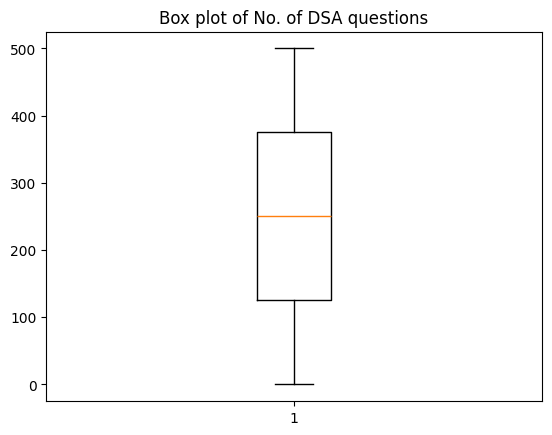

In [141]:

plt.boxplot(data['No. of DSA questions'])
plt.title('Box plot of No. of DSA questions')
plt.show()

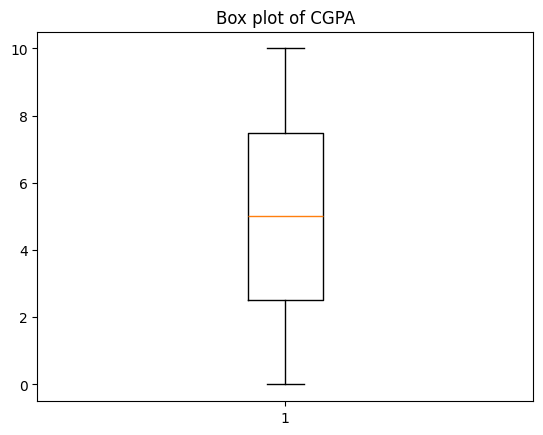

In [108]:
plt.boxplot(data['CGPA'])
plt.title('Box plot of CGPA')
plt.show()

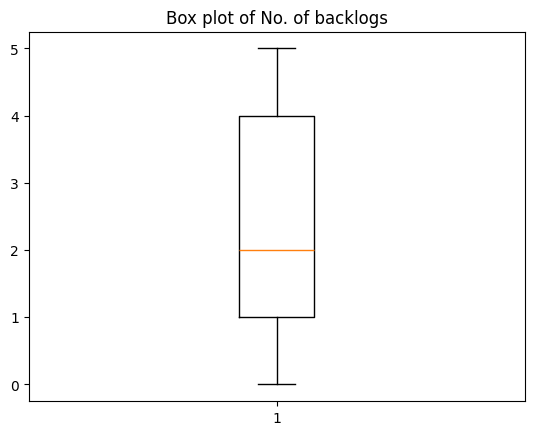

In [142]:
plt.boxplot(data['No. of backlogs'])
plt.title('Box plot of No. of backlogs')
plt.show()

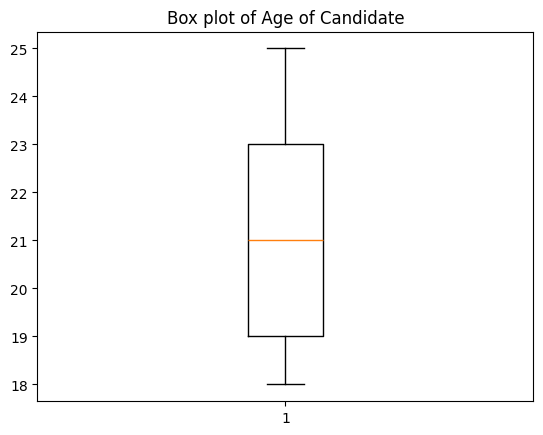

In [143]:
plt.boxplot(data['Age of Candidate'])
plt.title('Box plot of Age of Candidate')
plt.show()


Preprocessing

In [144]:
print("\n Data Preprocessing :::")


 Data Preprocessing :::


In [145]:
# column branch of engineering has categorical value , conerting to numerical
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [146]:
print(data['Branch of Engineering'].value_counts())

Branch of Engineering
Electrical Engineering    50609
Mechanical Engineering    50234
Computer Science          50212
Civil Engineering         50082
Name: count, dtype: int64


In [147]:
# Applying the encoder to branch of Engineering .
data['Branch of Engineering'] = enc.fit_transform(data['Branch of Engineering'])
print(data['Branch of Engineering'].value_counts())


Branch of Engineering
2    50609
3    50234
1    50212
0    50082
Name: count, dtype: int64


splitting the datas into oinput and output

In [148]:
# x= input
# y= output ( target)
X = data.drop(columns=['Placement Package', 'Name of Student', 'Roll No.'])
y = data['Placement Package']

In [116]:
print("\n inputs - first 3 rows after preprocessing:")
print(X.head(3))
print("\nTarget (y) - first 3 values:")
print(y.head(3))


 inputs - first 3 rows after preprocessing:
   No. of DSA questions  CGPA  Knows ML  Knows DSA  Knows Python  \
0                   151  8.52       1.0          1           1.0   
1                    24  1.23       1.0          0           0.0   
2                   333  9.85       0.0          1           1.0   

   Knows JavaScript  No. of backlogs  Age of Candidate  Branch of Engineering  
0               1.0                2                24                      1  
1               1.0                1                18                      1  
2               0.0                1                25                      3  

Target (y) - first 3 values:
0    20.01
1    10.97
2     7.51
Name: Placement Package, dtype: float64


In [149]:
# Scalinhg numerical bvalues in a similar range.
# StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Create our scaler object

In [150]:

num_cols = [
    'No. of DSA questions',
    'CGPA',
    'No. of backlogs',
    'Age of Candidate'
]

In [151]:

# Appling scaling
X[num_cols] = scaler.fit_transform(X[num_cols])

In [152]:

print("\n inputs after scaling numerical columns (first 3 rows):")
print(X.head(3))


 inputs after scaling numerical columns (first 3 rows):
   No. of DSA questions      CGPA  Knows ML  Knows DSA  Knows Python  \
0             -0.686136  1.218346       1.0          1           1.0   
1             -1.565026 -1.307291       1.0          0           0.0   
2              0.573376  1.679128       0.0          1           1.0   

   Knows JavaScript  No. of backlogs  Age of Candidate  Branch of Engineering  
0               1.0        -0.290560          1.092551                      1  
1               1.0        -0.875843         -1.526662                      1  
2               0.0        -0.875843          1.529087                      3  


Model Training & Testing

splitting data into training and testing


 Model Training & Testing :::
Training data shape: (160909, 9)
Testing data shape: (40228, 9)

 Training our Gradient Boosting Regresson model...

 gradient Boosting Model accuracy:
Mean squared error (MSE): 76.69
R-squared (R2 Score): 0.69


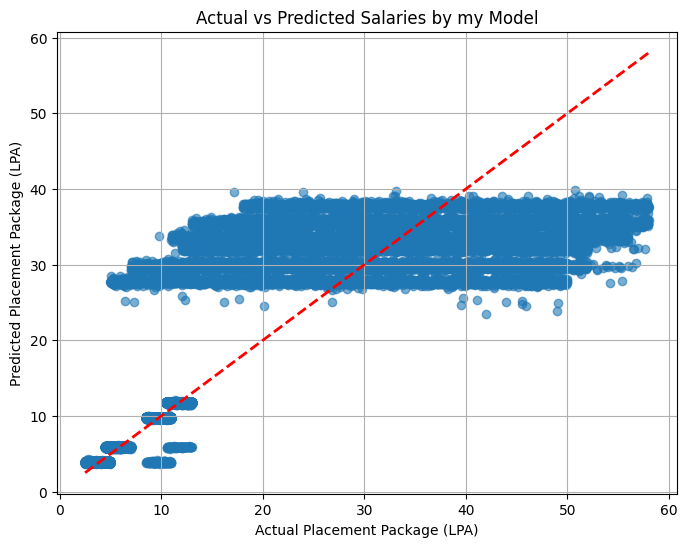

In [153]:
#using gradient

print("\n Model Training & Testing :::")

from sklearn.model_selection import train_test_split # to split data
from sklearn.ensemble import GradientBoostingRegressor #  model
from sklearn.metrics import mean_squared_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


print("\n Training our Gradient Boosting Regresson model...")
gbm_mod = GradientBoostingRegressor(random_state=42)
gbm_mod.fit(X_train, y_train)


y_pred = gbm_mod.predict(X_test)


mse_val = mean_squared_error(y_test, y_pred)
r2_val = r2_score(y_test, y_pred)

print(f"\n gradient Boosting Model accuracy:")
print(f"Mean squared error (MSE): {mse_val:.2f}")
print(f"R-squared (R2 Score): {r2_val:.2f}")

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6) # Plot actual vs predicted points
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Draw a perfect prediction line
plt.xlabel("Actual Placement Package (LPA)")
plt.ylabel("Predicted Placement Package (LPA)")
plt.title("Actual vs Predicted Salaries by my Model")
plt.grid(True)
plt.show()


saving the model

In [154]:

print("\n  Model Saving :::")
import joblib

joblib.dump(gbm_mod, "placement_gbm_model.pkl")
print("Saving the main model as 'placement_gbm_model.pkl'")


joblib.dump(scaler, "scaler.pkl")
print("Saving the scaler as 'scaler.pkl'")


joblib.dump(enc, "branch_encoder.pkl")
print("Saving the branch encoder as 'branch_encoder.pkl'")



  Model Saving :::
Saving the main model as 'placement_gbm_model.pkl'
Saving the scaler as 'scaler.pkl'
Saving the branch encoder as 'branch_encoder.pkl'


Web App using Streamlit

In [155]:
!pip install streamlit

In [156]:

%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

model = joblib.load("placement_gbm_model.pkl")


scaler = joblib.load("scaler.pkl")
branch_encoder = joblib.load("branch_encoder.pkl")


branch_opts = branch_encoder.classes_

st.set_page_config(page_title="Fresher Salary Predictor", page_icon="🎓", layout="centered")

st.title("🎓 Employee( Fresher) Placement Salary Predictor")
st.markdown("Hello 👋!!! Welcome 🙏 .This app helps to predict the estimated placement package for college freshers.")
st.markdown("Just enter some details, and our model will try to predict the salary as your qualities !")

st.sidebar.header("Input Student Details")


age = st.sidebar.slider("Age of Candidate", 18, 30, 21)
dsa_q = st.sidebar.slider("No. of DSA questions", 0, 500, 100)
cgpa = st.sidebar.slider("CGPA (out of 10)", 0.0, 10.0, 7.5, 0.1)
backlogs = st.sidebar.slider("No. of backlogs", 0, 10, 0)

branch = st.sidebar.selectbox("Branch of Engineering", branch_opts)


knows_ml = st.sidebar.checkbox("Knows ML?")
knows_dsa = st.sidebar.checkbox("Knows DSA?")
knows_python = st.sidebar.checkbox("Knows Python?")
knows_js = st.sidebar.checkbox("Knows JavaScript?")


expected_feat_order = [
    'No. of DSA questions', 'CGPA', 'Knows ML', 'Knows DSA', 'Knows Python',
    'Knows JavaScript', 'No. of backlogs', 'Age of Candidate', 'Branch of Engineering'
]

input_data_dict = {
    'No. of DSA questions': dsa_q,
    'CGPA': cgpa,
    'Knows ML': 1 if knows_ml else 0,
    'Knows DSA': 1 if knows_dsa else 0,
    'Knows Python': 1 if knows_python else 0,
    'Knows JavaScript': 1 if knows_js else 0,
    'No. of backlogs': backlogs,
    'Age of Candidate': age,
    'Branch of Engineering': branch
}


input_df = pd.DataFrame([input_data_dict], columns=expected_feat_order)


input_df['Branch of Engineering'] = branch_encoder.transform(input_df['Branch of Engineering'])


num_cols_for_scaling = [
    'No. of DSA questions', 'CGPA', 'No. of backlogs', 'Age of Candidate'
]
input_df[num_cols_for_scaling] = scaler.transform(input_df[num_cols_for_scaling])


st.write("### 🔎 Input Data (Processed for Model)")
st.write(input_df)


if st.button("Predict Placement Package"):
    prediction = model.predict(input_df)
    st.success(f"🎉 Congratulations Your Estimated Placement Package: ₹{prediction[0]:.2f} LPA")
    st.balloons()

# Batch prediction
st.markdown("---")
st.markdown("#### 📂 Batch Prediction")
uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type="csv")

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("Uploaded data preview:", batch_data.head())

    batch_data_for_model = batch_data.copy()


    cols_to_drop_from_batch_for_model = [
        'Name of Student', 'Roll No.',
        'Interview Room Temperature', 'Knows Cricket', 'Knows Dance',
        'Participated in College Fest', 'Was in Coding Club', 'Knows HTML', 'Knows CSS',
        'Placement Package'
    ]


    for col in cols_to_drop_from_batch_for_model:
        if col in batch_data_for_model.columns:
            batch_data_for_model = batch_data_for_model.drop(columns=[col])


    yn_cols_batch = ['Knows ML', 'Knows DSA', 'Knows Python', 'Knows JavaScript']
    for col in yn_cols_batch:

        batch_data_for_model[col] = batch_data_for_model[col].map({'Yes': 1, 'No': 0})


    batch_data_for_model = batch_data_for_model[(batch_data_for_model['Age of Candidate'] >= 18) & (batch_data_for_model['Age of Candidate'] <= 30)]


    batch_data_for_model.drop_duplicates(inplace=True)


    batch_data_for_model['Branch of Engineering'] = branch_encoder.transform(batch_data_for_model['Branch of Engineering'])


    num_cols_for_scaling_batch = [
        'No. of DSA questions', 'CGPA', 'No. of backlogs', 'Age of Candidate'
    ]
    batch_data_for_model[num_cols_for_scaling_batch] = scaler.transform(batch_data_for_model[num_cols_for_scaling_batch])


    for col in expected_feat_order:
        if col not in batch_data_for_model.columns:
            batch_data_for_model[col] = 0

    batch_data_final_for_model = batch_data_for_model[expected_feat_order]

    st.write("Processed data for batch prediction (first 5 rows):")
    st.write(batch_data_final_for_model.head())

    batch_preds = model.predict(batch_data_final_for_model)
    batch_data['Predicted Placement Package (LPA)'] = batch_preds
    st.write("✅ Predictions:")
    st.write(batch_data.head())
    csv = batch_data.to_csv(index=False).encode('utf-8')
    st.download_button("Download Predictions CSV", csv, file_name='predicted_packages.csv', mime='text/csv')


Overwriting app.py


In [157]:
!pip install pyngrok

In [158]:
!ngrok authtoken 30GeAy5meKsRaoMwrfkxL1uOAeP_5QabN2e3XroLYGSsX9mDa

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [160]:
from pyngrok import ngrok
import subprocess
import time


ngrok.kill()


process = subprocess.Popen(["streamlit", "run", "app.py", "--server.port", "8501"])

time.sleep(5)


public_url = ngrok.connect(8501)

print(f"Your Streamlit app is live at: {public_url}")



Your Streamlit app is live at: NgrokTunnel: "https://1a53a4a3d80d.ngrok-free.app" -> "http://localhost:8501"
